# Customer Segmentation ML

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading the data

In [2]:
df = pd.read_csv(r"C:\Users\arnol\Desktop\Customer_Segementation_End-to-End_Analysis\correlation.csv")
df.head(5)

,Customer ID,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase_Date,...,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group,Age Group,Month,Day_of_Week,Quarter,Year,Day
0,84966,23,Female,Married,Associate Degree,Mizoram,Entrepreneur,70541,policy5,2018-04-10,...,In-Person Meeting,Afternoon,English,Segment5,21-30,4,1,2,2018,10
1,95568,26,Male,Widowed,Doctorate,Goa,Manager,54168,policy5,2018-11-06,...,In-Person Meeting,Morning,French,Segment5,21-30,11,1,4,2018,6
2,10544,29,Female,Single,Associate Degree,Rajasthan,Entrepreneur,73899,policy5,2021-06-05,...,Mail,Evening,German,Segment3,21-30,6,5,2,2021,5
3,77033,20,Male,Divorced,Bachelor's Degree,Sikkim,Entrepreneur,63381,policy5,2018-09-02,...,In-Person Meeting,Anytime,French,Segment3,21-30,9,6,3,2018,2
4,88160,25,Female,Separated,Bachelor's Degree,West Bengal,Manager,38794,policy1,2018-09-10,...,Text,Weekends,English,Segment2,21-30,9,0,3,2018,10


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53503 entries, 0 to 53502
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Customer ID                         53503 non-null  int64 
 1   Age                                 53503 non-null  int64 
 2   Gender                              53503 non-null  object
 3   Marital Status                      53503 non-null  object
 4   Education Level                     53503 non-null  object
 5   Geographic Information              53503 non-null  object
 6   Occupation                          53503 non-null  object
 7   Income Level                        53503 non-null  int64 
 8   Behavioral Data                     53503 non-null  object
 9   Purchase_Date                       53503 non-null  object
 10  Interactions with Customer Service  53503 non-null  object
 11  Insurance Products Owned            53503 non-null  ob

In [4]:
df.describe()

,Customer ID,Age,Income Level,Coverage Amount,Premium Amount,Month,Day_of_Week,Quarter,Year,Day
count,53503.000000,53503.000000,53503.000000,53503.000000,53503.000000,53503.000000,53503.000000,53503.000000,53503.000000,53503.000000
mean,52265.204998,44.140945,82768.324318,492580.789638,3023.702447,6.488552,3.014037,2.494402,2020.510196,14.598340
std,28165.000067,15.079486,36651.075670,268405.505571,1285.834295,3.477814,2.013786,1.125337,1.707074,8.056177
min,1.000000,18.000000,20001.000000,50001.000000,500.000000,1.000000,0.000000,1.000000,2018.000000,1.000000
25%,28950.500000,32.000000,51568.500000,249613.500000,1817.000000,3.000000,1.000000,1.000000,2019.000000,8.000000
50%,55858.000000,43.000000,80719.000000,477261.000000,3194.000000,6.000000,3.000000,2.000000,2021.000000,15.000000
75%,76096.000000,57.000000,115973.500000,739124.000000,4311.500000,10.000000,5.000000,4.000000,2022.000000,22.000000
max,100000.000000,70.000000,149999.000000,1000000.000000,5000.000000,12.000000,6.000000,4.000000,2023.000000,28.000000


In [5]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Marital Status', 'Education Level',
       'Geographic Information', 'Occupation', 'Income Level',
       'Behavioral Data', 'Purchase_Date',
       'Interactions with Customer Service', 'Insurance Products Owned',
       'Coverage Amount', 'Premium Amount', 'Policy Type',
       'Customer Preferences', 'Preferred Communication Channel',
       'Preferred Contact Time', 'Preferred Language', 'Segmentation Group',
       'Age Group', 'Month', 'Day_of_Week', 'Quarter', 'Year', 'Day'],
      dtype='object')

In [6]:
df.isnull().sum()

Customer ID                           0
Age                                   0
Gender                                0
Marital Status                        0
Education Level                       0
Geographic Information                0
Occupation                            0
Income Level                          0
Behavioral Data                       0
Purchase_Date                         0
Interactions with Customer Service    0
Insurance Products Owned              0
Coverage Amount                       0
Premium Amount                        0
Policy Type                           0
Customer Preferences                  0
Preferred Communication Channel       0
Preferred Contact Time                0
Preferred Language                    0
Segmentation Group                    0
Age Group                             0
Month                                 0
Day_of_Week                           0
Quarter                               0
Year                                  0


## Splitting the data to training and test sets.

In [7]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [8]:
train_set, test_set = split_train_test(df, 0.2)
print(len(train_set))
print(len(test_set))

42803
10700


## Better Splitting Method

In [9]:
from zlib import crc32

In [10]:
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio *2**32

In [11]:
def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_:test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [12]:
train_set, test_set = split_train_test_by_id(df, 0.2, "Customer ID")
print(len(train_set))
print(len(test_set))

42787
10716


In [13]:
# Using Scikit-learns train_test_split.

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

print(len(train_set))
print(len(test_set))

42802
10701


## Stratified sampling

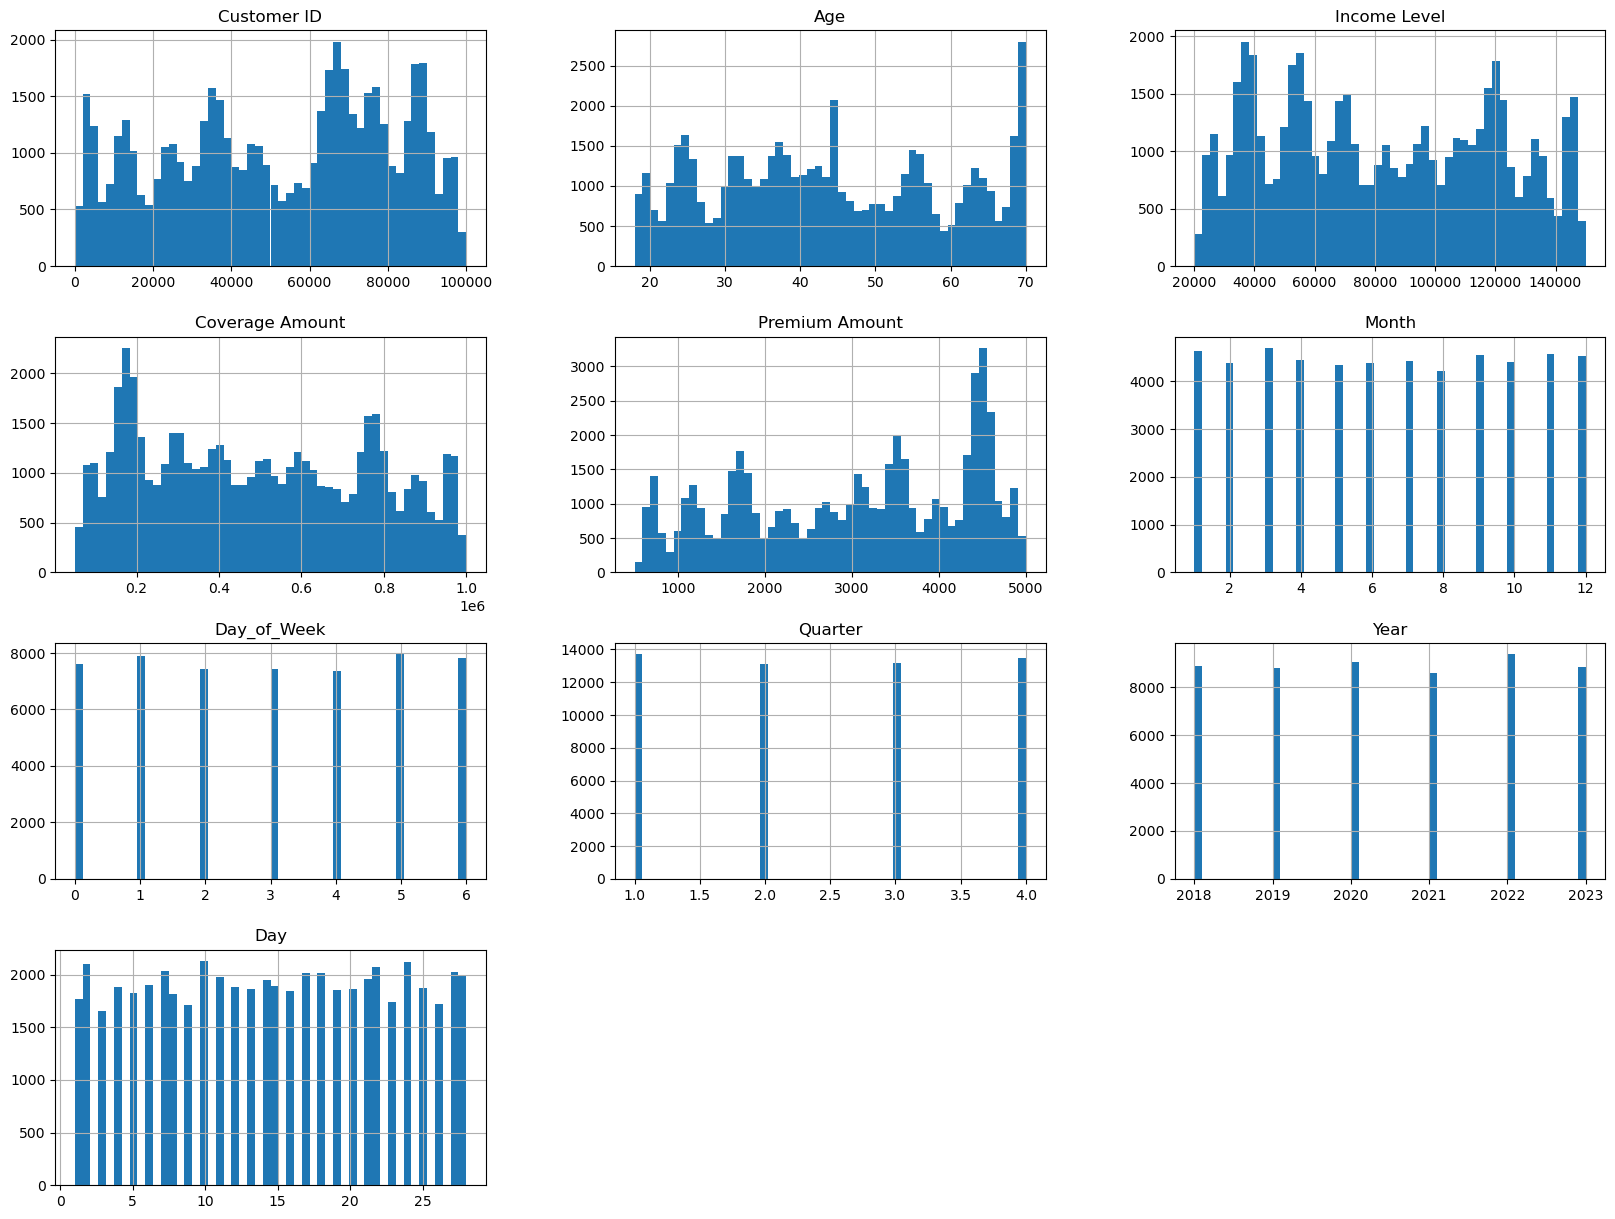

In [14]:
%matplotlib inline
df.hist(bins=50, figsize=(20, 15))
plt.show()

In [15]:
## Creating a Premium amount category

In [16]:
df["Income Level"].max()

149999

In [17]:
df["Income Level"].median()

80719.0

In [18]:
### Creating a premium amount category column.

In [28]:
df["income_cat"] = pd.cut(df["Income Level"],
                          bins=[0, 30000, 60000, 90000, 120000, 149000, np.inf],
                          labels=[1, 2, 3, 4, 5, 6])

<Axes: >

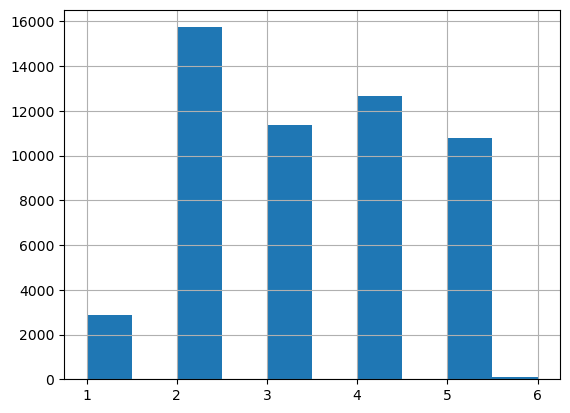

In [29]:
df["income_cat"].hist()

In [21]:
# Doing Stratified sampling on the Using the income category.

In [30]:
from sklearn.model_selection import StratifiedShuffleSplit

In [31]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["income_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [32]:
# Checking if the stratified sampling worked.
# Checking in the premium category proportions in the test set:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
2    0.293991
4    0.236987
3    0.212036
5    0.201383
1    0.053920
6    0.001682
Name: count, dtype: float64

In [33]:
# Removing the premium category attribute so the data is back to it's original state.
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Light Exploration

array([[<Axes: xlabel='Premium Amount', ylabel='Premium Amount'>,
        <Axes: xlabel='Income Level', ylabel='Premium Amount'>,
        <Axes: xlabel='Coverage Amount', ylabel='Premium Amount'>],
       [<Axes: xlabel='Premium Amount', ylabel='Income Level'>,
        <Axes: xlabel='Income Level', ylabel='Income Level'>,
        <Axes: xlabel='Coverage Amount', ylabel='Income Level'>],
       [<Axes: xlabel='Premium Amount', ylabel='Coverage Amount'>,
        <Axes: xlabel='Income Level', ylabel='Coverage Amount'>,
        <Axes: xlabel='Coverage Amount', ylabel='Coverage Amount'>]],
      dtype=object)

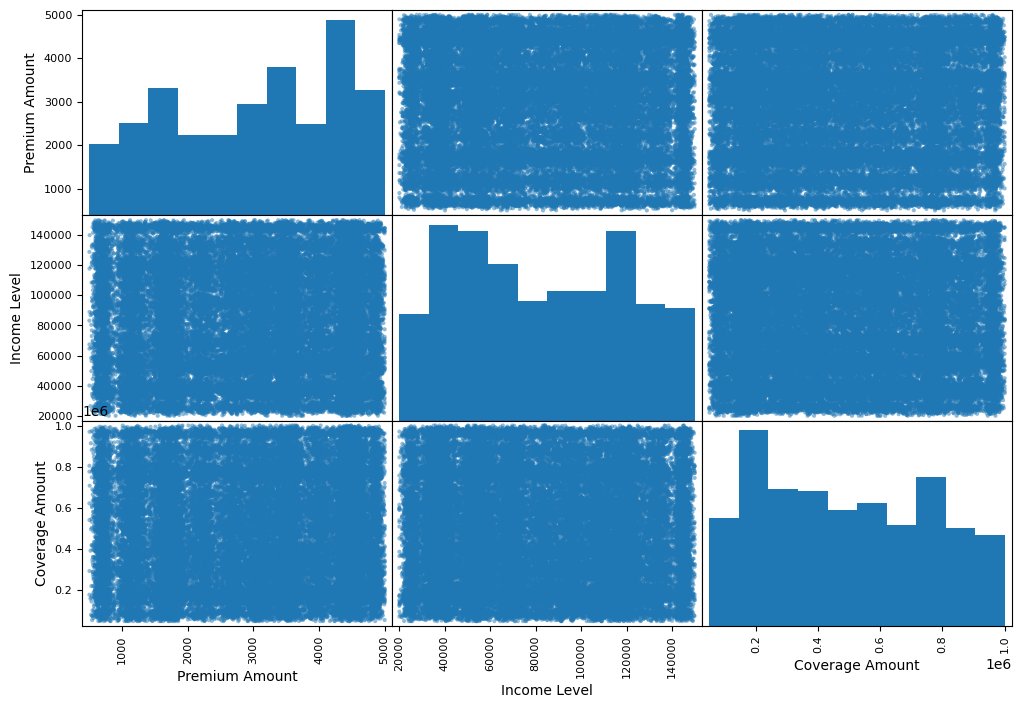

In [27]:
from pandas.plotting import scatter_matrix

attributes = ["Premium Amount", "Income Level", "Coverage Amount"]
scatter_matrix(df[attributes], figsize=(12, 8))

In [34]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Marital Status', 'Education Level',
       'Geographic Information', 'Occupation', 'Income Level',
       'Behavioral Data', 'Purchase_Date',
       'Interactions with Customer Service', 'Insurance Products Owned',
       'Coverage Amount', 'Premium Amount', 'Policy Type',
       'Customer Preferences', 'Preferred Communication Channel',
       'Preferred Contact Time', 'Preferred Language', 'Segmentation Group',
       'Age Group', 'Month', 'Day_of_Week', 'Quarter', 'Year', 'Day',
       'income_cat'],
      dtype='object')

## Preparing the data for ML Algorithms

In [35]:
df = strat_train_set.drop("Premium Amount", axis=1)
df_labels = strat_train_set["Premium Amount"].copy()

In [ ]:
# Creating an imputer that will calclate the median of each numerical value.

In [36]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

#lets remove the non-numerical attributes.
df_num = df.select_dtypes(include=["number"])
df_num.columns

Index(['Customer ID', 'Age', 'Income Level', 'Coverage Amount', 'Month',
       'Day_of_Week', 'Quarter', 'Year', 'Day'],
      dtype='object')

In [37]:
# Fitting Imputer instance to the training data using the fit() method.
imputer.fit(df_num)

SimpleImputer(strategy='median')

In [38]:
imputer.statistics_

array([5.59475e+04, 4.30000e+01, 8.06495e+04, 4.74746e+05, 6.00000e+00,
       3.00000e+00, 2.00000e+00, 2.02100e+03, 1.50000e+01])

In [40]:
df_num.median().values

array([5.59475e+04, 4.30000e+01, 8.06495e+04, 4.74746e+05, 6.00000e+00,
       3.00000e+00, 2.00000e+00, 2.02100e+03, 1.50000e+01])

In [41]:
# Using the trained imputer to transform the training set by replacing missing values with the learned medians:

X = imputer.transform(df_num)

In [44]:
# The above data is in a numpy array format, we can change it into a pandas dataframe by:-

df_tr = pd.DataFrame(X, columns=df_num.columns,
                     index=df_num.index)

df_tr

,Customer ID,Age,Income Level,Coverage Amount,Month,Day_of_Week,Quarter,Year,Day
29090,64340.0,46.0,31200.0,154658.0,2.0,5.0,1.0,2022.0,26.0
46421,88173.0,39.0,110583.0,612875.0,7.0,0.0,3.0,2022.0,11.0
22297,75217.0,20.0,110499.0,612507.0,9.0,5.0,3.0,2019.0,28.0
16428,26210.0,19.0,57140.0,397955.0,9.0,0.0,3.0,2019.0,23.0
30655,89108.0,24.0,65004.0,342191.0,4.0,3.0,2.0,2023.0,20.0
...,...,...,...,...,...,...,...,...,...
15185,98962.0,69.0,134722.0,361300.0,4.0,5.0,2.0,2023.0,15.0
6952,31408.0,67.0,58376.0,458385.0,2.0,2.0,1.0,2018.0,21.0
47301,48206.0,25.0,86457.0,174195.0,10.0,1.0,4.0,2018.0,23.0
7051,14136.0,58.0,144673.0,94826.0,7.0,5.0,3.0,2018.0,14.0


In [45]:
## Handling texts and categorical attributes:-

In [46]:
df_cat = df.drop(df.select_dtypes(include=["number"]), axis=1)
df_cat

,Gender,Marital Status,Education Level,Geographic Information,Occupation,Behavioral Data,Purchase_Date,Interactions with Customer Service,Insurance Products Owned,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group,Age Group
29090,Male,Divorced,High School Diploma,Himachal Pradesh,Doctor,policy1,2022-02-26,In-Person,policy1,Group,Mail,Email,Weekends,Spanish,Segment1,41-50
46421,Female,Married,Associate Degree,Manipur,Doctor,policy1,2022-07-11,Phone,policy1,Individual,In-Person Meeting,Mail,Afternoon,French,Segment4,31-40
22297,Female,Married,Master's Degree,Kerala,Manager,policy4,2019-09-28,Chat,policy4,Business,Email,Phone,Afternoon,English,Segment5,21-30
16428,Female,Divorced,Master's Degree,Bihar,Teacher,policy3,2019-09-23,Email,policy4,Individual,Email,Text,Evening,English,Segment4,0-20
30655,Male,Separated,Master's Degree,Punjab,Manager,policy2,2023-04-20,In-Person,policy3,Business,Phone,Mail,Weekends,French,Segment4,21-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15185,Male,Single,Associate Degree,Assam,Artist,policy5,2023-04-15,Chat,policy3,Business,In-Person Meeting,Mail,Evening,German,Segment5,61-70
6952,Male,Married,Associate Degree,Madhya Pradesh,Artist,policy3,2018-02-21,Mobile App,policy2,Family,In-Person Meeting,Text,Weekends,Spanish,Segment4,61-70
47301,Male,Widowed,High School Diploma,Uttarakhand,Doctor,policy5,2018-10-23,Chat,policy1,Family,Email,In-Person Meeting,Anytime,Mandarin,Segment3,21-30
7051,Male,Divorced,Master's Degree,Assam,Nurse,policy5,2018-07-14,Chat,policy5,Family,Mail,Phone,Weekends,French,Segment5,51-60


In [47]:
df_cat.nunique()

Gender                                   2
Marital Status                           5
Education Level                          5
Geographic Information                  35
Occupation                               9
Behavioral Data                          5
Purchase_Date                         2016
Interactions with Customer Service       5
Insurance Products Owned                 5
Policy Type                              4
Customer Preferences                     5
Preferred Communication Channel          5
Preferred Contact Time                   5
Preferred Language                       5
Segmentation Group                       5
Age Group                                7
dtype: int64

In [49]:
# Converting the categorical texts into numbers.

from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
df_cat_encoded = ordinal_encoder.fit_transform(df_cat)
df_cat_encoded[:10]

array([[1.000e+00, 0.000e+00, 3.000e+00, 1.300e+01, 1.000e+00, 0.000e+00,
        1.397e+03, 2.000e+00, 0.000e+00, 2.000e+00, 2.000e+00, 0.000e+00,
        4.000e+00, 4.000e+00, 0.000e+00, 3.000e+00],
       [0.000e+00, 1.000e+00, 0.000e+00, 2.000e+01, 1.000e+00, 0.000e+00,
        1.522e+03, 4.000e+00, 0.000e+00, 3.000e+00, 1.000e+00, 2.000e+00,
        0.000e+00, 1.000e+00, 3.000e+00, 2.000e+00],
       [0.000e+00, 1.000e+00, 4.000e+00, 1.600e+01, 5.000e+00, 3.000e+00,
        5.870e+02, 0.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 3.000e+00,
        0.000e+00, 0.000e+00, 4.000e+00, 1.000e+00],
       [0.000e+00, 0.000e+00, 4.000e+00, 4.000e+00, 8.000e+00, 2.000e+00,
        5.820e+02, 1.000e+00, 3.000e+00, 3.000e+00, 0.000e+00, 4.000e+00,
        2.000e+00, 0.000e+00, 3.000e+00, 0.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 2.600e+01, 5.000e+00, 1.000e+00,
        1.783e+03, 2.000e+00, 2.000e+00, 0.000e+00, 3.000e+00, 2.000e+00,
        4.000e+00, 1.000e+00, 3.000e+00, 1.000e+

In [50]:
ordinal_encoder.categories_

[array(['Female', 'Male'], dtype=object),
 array(['Divorced', 'Married', 'Separated', 'Single', 'Widowed'],
       dtype=object),
 array(['Associate Degree', "Bachelor's Degree", 'Doctorate',
        'High School Diploma', "Master's Degree"], dtype=object),
 array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
        'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
        'Chhattisgarh', 'Dadra and Nagar Haveli', 'Daman and Diu', 'Delhi',
        'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jharkhand',
        'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh',
        'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
        'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
        'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
        'Uttarakhand', 'West Bengal'], dtype=object),
 array(['Artist', 'Doctor', 'Engineer', 'Entrepreneur', 'Lawyer',
        'Manager', 'Nurse', 'Salesperson', 'Teacher'], dtype=object),
 array(['policy1', 'policy

In [51]:
# Doing a One Hot Encoding for the categorical data:

# The result will be a sparse matrix - only stores the locations of the 1s to save memory instead of saving all the 0s in memory.

from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
df_cat_1hot = cat_encoder.fit_transform(df_cat)
df_cat_1hot

<42802x2123 sparse matrix of type '<class 'numpy.float64'>'
	with 684832 stored elements in Compressed Sparse Row format>

## Creating a Category transformer.

In [55]:
from sklearn.base import BaseEstimator, TransformerMixin

class ColumnRemover(BaseEstimator, TransformerMixin):
    def __init__(self, remove_columns=True, columns_to_remove=None):
        self.remove_columns = remove_columns
        self.columns_to_remove = columns_to_remove

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if self.remove_columns:
            # Remove specified columns
            X_transformed = X.drop(columns=self.columns_to_remove)
        else:
            X_transformed = X

        return X_transformed

### Creating a categorical data transformation pipeline

In [82]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Specify the columns to be removed
columns_to_remove = ['Customer Preferences', 'Preferred Communication Channel', 'Preferred Contact Time']

# Create the pipeline
cat_pipeline = Pipeline([
    ('column_remover', ColumnRemover(remove_columns=False, columns_to_remove=columns_to_remove)),
    ('one_hot_encoder', OneHotEncoder(handle_unknown = 'ignore'))
])

# Fit and transform the data
df_cat_tr = cat_pipeline.fit_transform(df_cat)

### Creating a numerical data pipeline

In [83]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

df_num_tr = num_pipeline.fit_transform(df_num)

In [84]:
from sklearn.compose import ColumnTransformer

num_attribs = list(df_num)
cat_attribs = list(df_cat)

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

df_prepared = full_pipeline.fit_transform(df)

In [85]:
df_prepared

<42802x2132 sparse matrix of type '<class 'numpy.float64'>'
	with 1070050 stored elements in Compressed Sparse Row format>

# Selecting and Training ML Models.

## Training a Linear Regression model.

In [79]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(df_prepared, df_labels)

LinearRegression()

In [80]:
# Testing the model against a few instances of the training data.

some_data = df.iloc[:5]
some_labels = df_labels.iloc[:5]
some_prepared_data = full_pipeline.transform(some_data)
print('Predictions:', lin_reg.predict(some_prepared_data))

print("Labels:", list(some_labels))

Predictions: [3086.86408511 2924.08460081 2707.48349031 3022.0205671  3933.78040009]
Labels: [1956, 1044, 2960, 2129, 4327]


In [ ]:
# Measuring the model's RMSE on the whole training set.

In [81]:
from sklearn.metrics import mean_squared_error
df_predictions = lin_reg.predict(df_prepared)
lin_mse = mean_squared_error(df_labels, df_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_mse

1546793.1860352429

## Training a Decision Tree Model

In [87]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(df_prepared, df_labels)

DecisionTreeRegressor()

In [89]:
# Evaluating the model on the training set

df_predictions = tree_reg.predict(df_prepared)
tree_mse = mean_squared_error(df_labels, df_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

### Performing Cross-Validation on the Decision Tree Model

In [90]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, df_prepared, df_labels, scoring="neg_mean_squared_error", cv=10)

tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(tree_rmse_scores)

Scores: [1824.61371323 1810.50754233 1838.35437598 1808.54748148 1832.80263576
 1833.35149251 1791.74388985 1798.90674179 1803.59610716 1816.2402068 ]
Mean: 1815.8664186889284
Standard deviation: 15.090720123358013


### Performing Cross-Validation on the Linear Regression Model.

In [92]:
lin_scores = cross_val_score(lin_reg, df_prepared, df_labels, scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [1323.09102977 1295.65241404 1326.1695441  1307.20817886 1317.22934047
 1314.12326608 1299.43723071 1308.95567311 1310.19401096 1310.84218176]
Mean: 1311.2902869841485
Standard deviation: 9.013892670617812


## Ensemble Learning with Random Forest

In [93]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(df_prepared, df_labels)

RandomForestRegressor()

In [94]:
# Evaluating the random forest regressor.

df_predictions = forest_reg.predict(df_prepared)
forest_mse = mean_squared_error(df_labels, df_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

482.45485514629115

### Random Forest Cross-Validation

In [ ]:
forest_scores = cross_val_score(forest_reg, df_prepared, df_labels,
                                scoring="neg_mean_squared_error", cv=10)

forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)